(section-first_order-ivp)=
# Initial-value problems

In [1]:
using Plots,DifferentialEquations
default(label="",linewidth=2,markersize=4)

One of the important findings in {numref}`section-first_order-preview` is that solutions of first-order ODEs are not unique. Instead, there is a *general solution* that describes a family of functions that provide all possible solutions. The manifestation of the nonuniqueness is a generalization of the usual integration constant.

```{index} paticular solution, ! initial-value problem; with first-order ODE
```

In scientific and engineering problems we typically have an additional constraint that picks out a single member of the solution family, i. e., a **particular solution**. Usually that constraint takes the form of a specified value,

$$
x(t_0) = x_0,
$$

where $t_0$ and $x_0$ are known or used as parameters. Such a constraint combined with a first-order ODE leads to an **initial-value problem**

````{proof:definition} Initial-value problem (IVP)
```{math}
\dd{x}{t} = f(t,x), \quad x(t_0) = x_0.
```
````

```{index} ! initial condition
```

In this case the constraint $x(t_0)=x_0$ is called an **initial condition**, and it's usually understood that the problem is to be solved for $t>t_0$.

A solution of an IVP has to satisfy both the ODE and the initial condition. This is almost always enough to specify the solution uniquely.

::::{proof:example}
In {numref}`section-first_order-preview` we found that the general solution of $x'=ax$ is $x(t)=Ce^{at}$. If we are supplied with the initial value $x(2)=5$, then we require

$$
5 = x(2) = Ce^{2a},
$$

in which case $C=5e^{-2a}$. Thus the solution to this IVP is

$$
x(t) = 5e^{-2a}\cdot e^{at} = 5e^{a(t-2)}.
$$
::::

A graphical interpretation of the role of an initial condition is that the general solution is a family of curves in the $(t,x)$ plane, and the initial condition is a point that the particular solution of interest must pass through. Here is an illustration for $x'=1.25x$, $x(3)=20$.

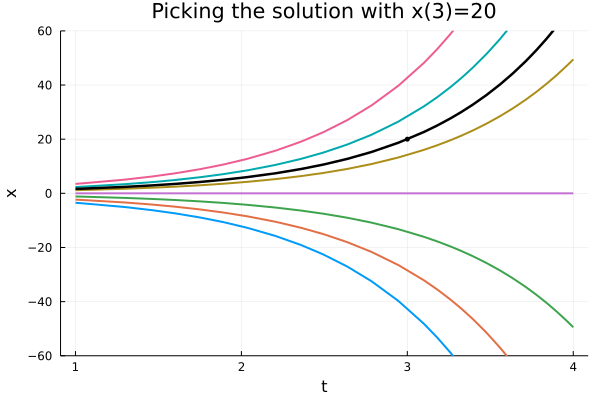

In [2]:
a = 1.25
plt = plot(xaxis=("t"),yaxis=("x",(-60,60)))
for C in (-3:3)/3
    plot!(t -> C*exp(a*t),1,4)
end

scatter!([3],[20],m=(3,:black))
plot!(t->20exp(a*(t-3)),1,4,l=(2.5,:black))
title!("Picking the solution with x(3)=20")

## Numerical solutions

Because an initial-value problem has a unique solution, it's a suitable target for a numerical simulation. Here's a numerical approximation of constant growth $x'=2x$, $x(1)=3$. in Julia.

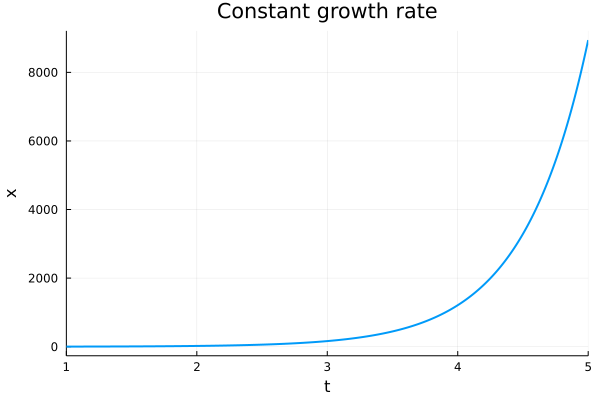

In [3]:
f = (x,p,t) -> 2x
ivp = ODEProblem(f,3.,(1.,5.))
x = solve(ivp)
plot(x,label="",xlabel="t",ylabel="x",title="Constant growth rate")

Exponential growth or decay is best plotted on a log-linear scale, where the solution becomes a straight line.

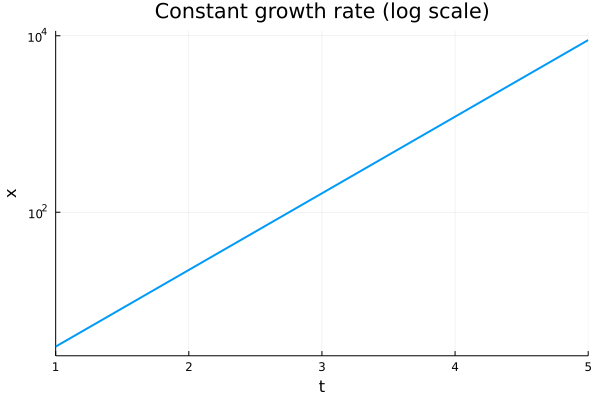

In [4]:
plot(x,label="",xaxis="t",yaxis=("x",:log10),title="Constant growth rate (log scale)")

Here's our example of variable growth. Note that we are not using the known exact solution, but just letting Julia create a numerical approximation by other means.

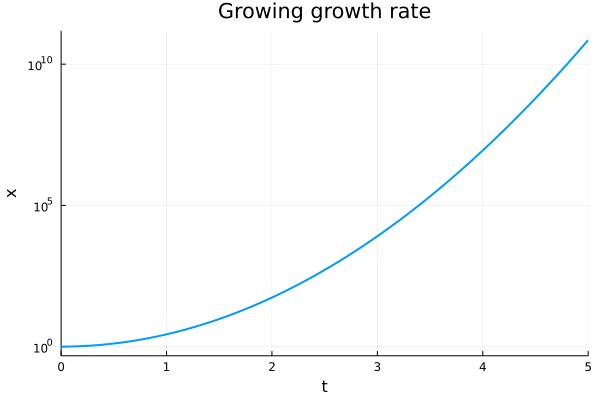

In [5]:
f = (x,p,t) -> 2t*x
ivp = ODEProblem(f,1.,(0.,5.))
x = solve(ivp)
plot(x,label="",xlabel="t",yaxis=("x",:log10),title="Growing growth rate")

Even on the log scale, the solution bends upward, showing superexponential growth. Finally, here is the nonlinear feedback problem.

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/driscoll/.julia/packages/SciMLBase/cA7Re/src/integrator_interface.jl:345


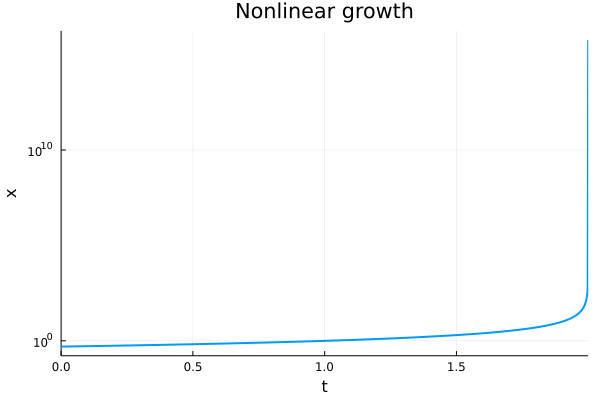

In [6]:
f = (x,p,t) -> x^2
ivp = ODEProblem(f,0.5,(0.,4.))
x = solve(ivp)
plot(x,label="",xlabel="t",yaxis=("x",:log10),title="Nonlinear growth")

The warning issued here can mean that there is a bug in the code, but in this case, it's just Julia noticing the finite-time blowup. In fact, it gets the true blowup time rather accurately.